In [8]:
!pip install opencv-python

In [2]:
!pip uninstall tensorflow

^C


In [1]:
import os
import torch
import torchvision
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D , AveragePooling2D , Dense, Flatten
from keras.models import Model
#from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from keras.layers import BatchNormalization
import cv2

# **Import of Dataset**

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #load dataset

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
len(y_train)

60000

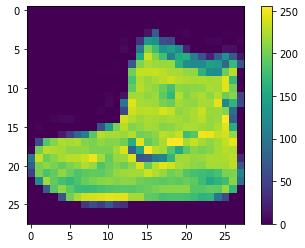

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

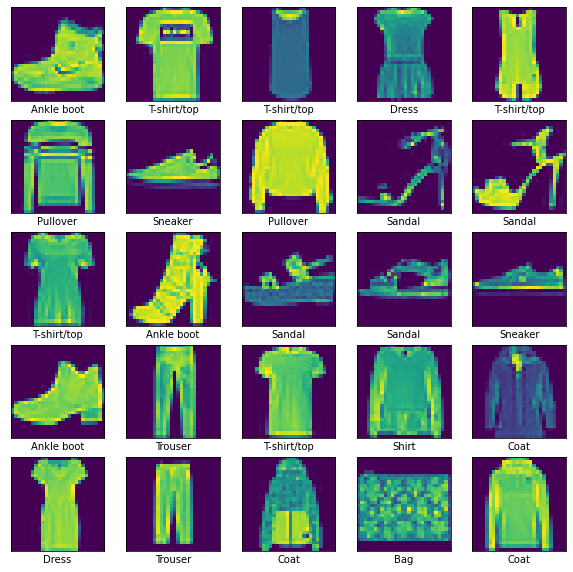

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

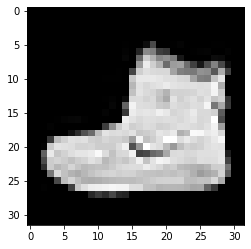

In [14]:
#preprocess images
from tensorflow.keras.utils import to_categorical

x_train = np.pad(x_train,((0,0),(2,2),(2,2)))
x_test = np.pad(x_test,((0,0),(2,2),(2,2))) 
x_train = x_train/255.0
x_test = x_test/255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

x_train = np.expand_dims(x_train,3)
x_test = np.expand_dims(x_test,3)

plt.imshow(x_train[0],cmap='gray')
plt.show()

In [9]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 32, 32, 1) y_train shape: (60000, 10)


In [10]:
model = Sequential(name="LeNet-5")
model.add(Conv2D(6,(5,5),strides=(1,1), activation='tanh',input_shape=(32,32,1), name='C1'))
model.add(AveragePooling2D(name='S2'))
model.add(Conv2D(16,(5,5),strides=(1,1),activation='tanh',name='C3'))
model.add(AveragePooling2D(name='S4'))
model.add(Flatten())
model.add(Dense(120,activation='tanh',name='FC5'))
model.add(Dense(84,activation='tanh',name='FC6'))
model.add(Dense(10,activation='softmax',name='Output'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4996 - accuracy: 0.8202
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3639 - accuracy: 0.8675
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3262 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3019 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2791 - accuracy: 0.8964
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2643 - accuracy: 0.9015
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2492 - accuracy: 0.9070
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2352 - accuracy: 0.9125
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2244 - accuracy: 0.9168
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/s

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3133 - accuracy: 0.8891
Test accuracy: 0.8891000151634216


In [13]:
train_loss, train_acc = model.evaluate(x_train, y_train)

print('Test accuracy:', train_acc)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1931 - accuracy: 0.9294
Test accuracy: 0.9294499754905701


In [14]:
predictions = model.predict(x_test)

In [15]:
predictions[0]

array([8.5989791e-07, 1.2799732e-09, 6.0974264e-07, 1.6578358e-07,
       7.7574590e-08, 1.5312960e-04, 1.1985529e-07, 5.3359959e-03,
       4.1752198e-08, 9.9450904e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# **Vuzualization**

In [43]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.where(true_label == 1.0)[0][0]:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[np.where(true_label == 1.0)[0][0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.where(true_label == 1.0)[0][0]].set_color('blue')

In [27]:
x_test = x_test.reshape(x_test.shape[0], 32, 32)

In [31]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

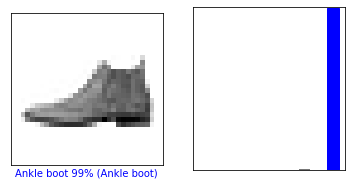

In [44]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

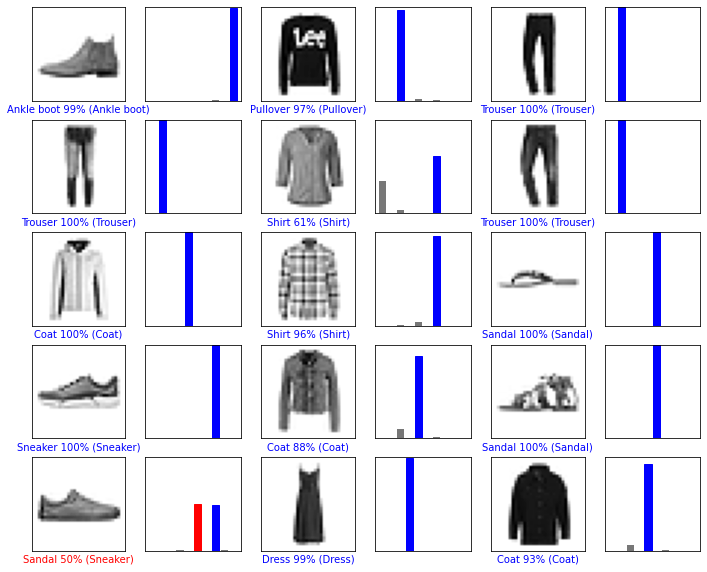

In [45]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()


In [46]:
# Grab an image from the test dataset
img = x_test[0]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(32, 32)
(1, 32, 32)


In [47]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.5989791e-07 1.2799732e-09 6.0974327e-07 1.6578373e-07 7.7574590e-08
  1.5313004e-04 1.1985540e-07 5.3360010e-03 4.1752276e-08 9.9450904e-01]]


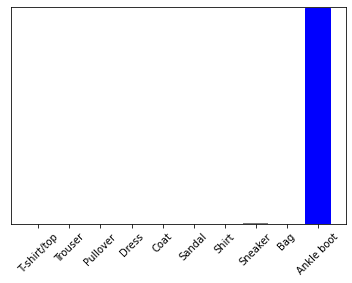

In [48]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [49]:
np.argmax(predictions_single[0])

9

# **Vizualization with t-SNE**

In [ ]:
from sklearn.manifold import TSNE

train = pd.read_csv(r'C:/Users/Andrii_Syd/Downloads/fashion-mnist_train.csv/fashion-mnist_train.csv')
test = pd.read_csv(r'C:/Users/Andrii_Syd/Downloads/fashion-mnist_test.csv/fashion-mnist_test.csv')
train_test = np.vstack([train, test])
y = train_test[:,0]
train_test = train_test[:,1:]

tsne = TSNE(n_components=2)
train_test_2D = tsne.fit_transform(train_test)

In [ ]:
from sklearn.manifold import TSNE

plt.scatter(train_test_2D[:,0], train_test_2D[:,1], c = y, s = 0.5)